In [22]:
import pandas as pd

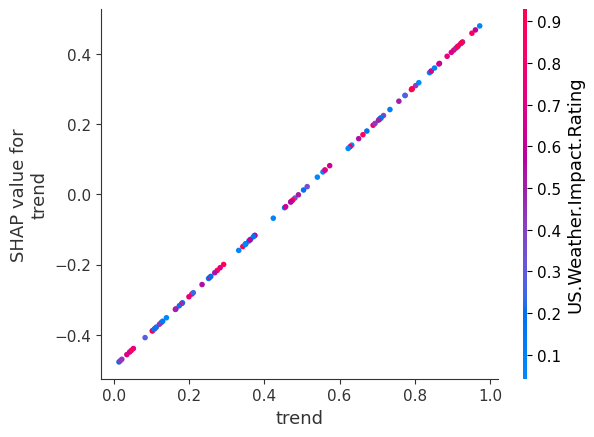

In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LinearRegression

# Load JSON file
with open(r'C:\Users\DeepakArun\Desktop\TWC\Robyn\ExportedModel.json', 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())
model = LinearRegression()
model.coef_ = np.array([coefficients[var] for var in feature_names])
model.intercept_ = intercept

# Prepare sample data (X) - This should be replaced with actual data
X = np.random.rand(100, len(feature_names))  # Replace with actual data

# Use SHAP to calculate SHAP values
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X)

# Function to plot SHAP values
def plot_shap_values(ax, shap_values, feature_names, index):
    shap.dependence_plot(index, shap_values.values, X, feature_names=feature_names, ax=ax)

# Plot SHAP values for a specific feature (for example, feature index 0)
fig, ax = plt.subplots()
plot_shap_values(ax, shap_values, feature_names, 0)
plt.show()


## Interaction effects

In [74]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import shap

# Load JSON file
with open(r"C:\Users\DeepakArun\Desktop\V2model1.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())

# Read data from csv file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Shapv2.xlsx")


#Min-Max Normalization
#df = df.drop('dep_var', axis=1)
#df= (df-df.min())/(df.max()-df.min())



# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}
model = LinearRegression()
model.coef_ = np.array([filtered_coefficients[var] for var in available_features])
model.intercept_ = intercept

# Prepare data (X) using only available features
X = df[available_features].values

# Use SHAP to calculate SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

#Get SHAP interaction values
#explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)

# SHAP interaction values (Approximation method)
#shap_interaction = shap_values.values[:, :, np.newaxis] / shap_values.values[:, np.newaxis, :]

# Compute the mean absolute SHAP interaction values along the correct axis
mean_shap = np.abs(shap_interaction).mean(axis=0)
#mean_shap = shap_interaction.mean(axis=0)
# Create a DataFrame from the mean SHAP values
df_shap = pd.DataFrame(mean_shap, index=available_features, columns=available_features)

# Multiply off-diagonal elements by 2
for i in range(len(df_shap)):
    for j in range(len(df_shap)):
        if i != j:
            df_shap.iloc[i, j] *= 2

# Create the heatmap
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.3g', cbar=False, ax=ax,
            annot_kws={"size": 15})  # Set annotation font size
ax.tick_params(axis='x', colors='w', labelsize=20, rotation=90)  # Increase tick label size
ax.tick_params(axis='y', colors='w', labelsize=20)

plt.suptitle("SHAP interaction values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0) 
plt.show()


Available features: ['trend', 'season', 'holiday', 'Preference', 'US_Weather_Impact_Rating', 'Net_Trust', 'NPS', 'EventsCamp.Vend_Campaign_Flag', 'Visits_Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
Missing features: []


AttributeError: 'LinearExplainer' object has no attribute 'shap_interaction_values'

Available features: ['trend', 'season', 'holiday', 'Preference', 'US_Weather_Impact_Rating', 'Net_Trust', 'NPS', 'EventsCamp.Vend_Campaign_Flag', 'Visits_Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
Missing features: []


C:\Users\DeepakArun\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


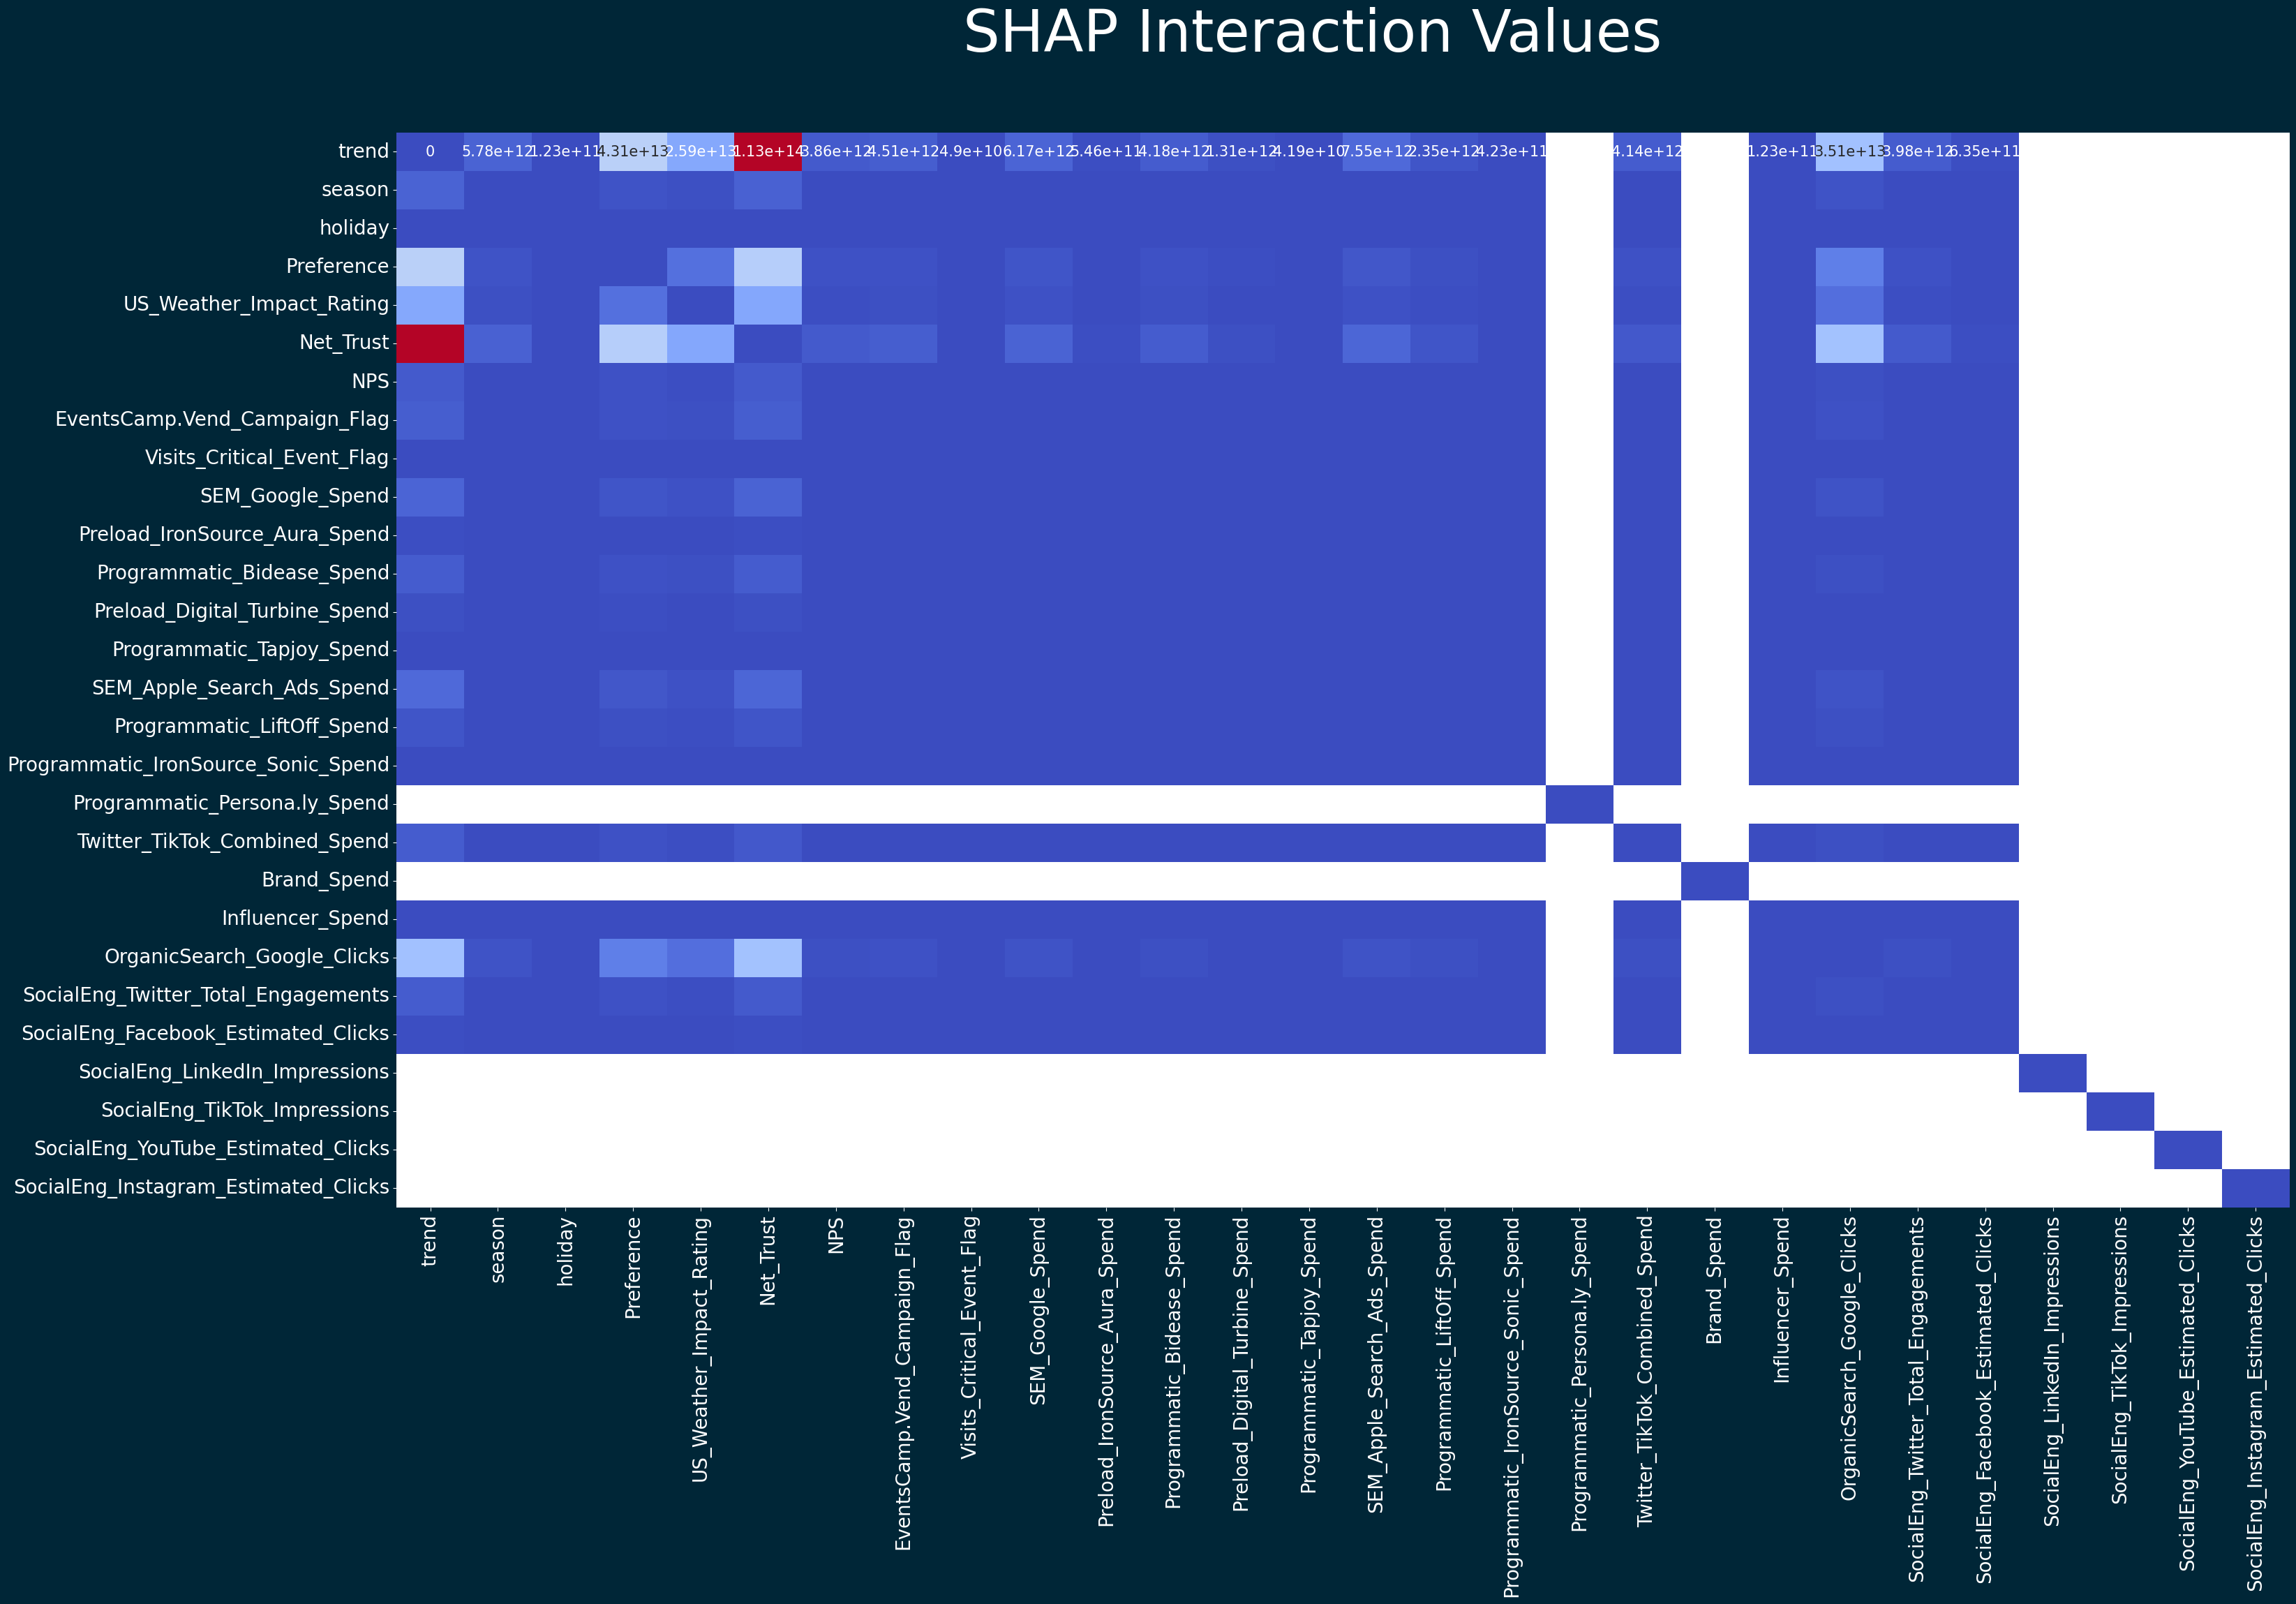

In [84]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import shap

# Load JSON file
with open(r"C:\Users\DeepakArun\Desktop\V2model1.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())

# Read data from csv file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Shapv2.xlsx")

# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}
model = LinearRegression()
model.coef_ = np.array([filtered_coefficients[var] for var in available_features])
model.intercept_ = intercept

# Prepare data (X) using only available features
X = df[available_features].values

# Use SHAP to calculate SHAP values
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X)

# Initialize SHAP interaction values matrix
num_features = len(available_features)
shap_interaction_values = np.zeros((X.shape[0], num_features, num_features))

# Calculate SHAP interaction values
for i in range(num_features):
    for j in range(i + 1, num_features):
        shap_interaction_values[:, i, j] = filtered_coefficients[available_features[i]] * filtered_coefficients[available_features[j]] * X[:, i] * X[:, j] / 2
        shap_interaction_values[:, j, i] = shap_interaction_values[:, i, j]  # Symmetric

# Compute the mean absolute SHAP interaction values along the correct axis
mean_shap_interaction = np.abs(shap_interaction_values).mean(axis=0)

# Create a DataFrame from the mean SHAP interaction values
df_shap = pd.DataFrame(mean_shap_interaction, index=available_features, columns=available_features)

# Multiply off-diagonal elements by 2
for i in range(len(df_shap)):
    for j in range(len(df_shap)):
        if i != j:
            df_shap.iloc[i, j] *= 2

# Create the heatmap
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.3g', cbar=False, ax=ax,
            annot_kws={"size": 15})  # Set annotation font size
ax.tick_params(axis='x', colors='w', labelsize=20, rotation=90)  # Increase tick label size
ax.tick_params(axis='y', colors='w', labelsize=20)

plt.suptitle("SHAP Interaction Values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0)
plt.show()


In [92]:
shap_values

.values =
array([[ 2355299.67495585,   -96789.23841728,     3332.54142955, ...,
                      nan,               nan,               nan],
       [ 2357227.53661298,  -107835.61654897,     3332.54142955, ...,
                      nan,               nan,               nan],
       [ 2359155.39827001,  -123653.15354836,     3332.54142955, ...,
                      nan,               nan,               nan],
       ...,
       [-2793462.42419249,  -115612.32235107,     3332.54142955, ...,
                      nan,               nan,               nan],
       [-2798253.15113963,  -110790.08460459,     3332.54142955, ...,
                      nan,               nan,               nan],
       [-2803043.87808678,   -98433.40596678,     3332.54142955, ...,
                      nan,               nan,               nan]])

.base_values =
array([nan, nan, nan, ..., nan, nan, nan])

.data =
array([[15761663.85923255,  -233189.90816178,        0.        , ...,
                      n

In [86]:
df_shap= df_shap.fillna(0)

In [88]:
df_shap

,trend,season,holiday,Preference,US_Weather_Impact_Rating,Net_Trust,NPS,EventsCamp.Vend_Campaign_Flag,Visits_Critical_Event_Flag,SEM_Google_Spend,...,Twitter_TikTok_Combined_Spend,Brand_Spend,Influencer_Spend,OrganicSearch_Google_Clicks,SocialEng_Twitter_Total_Engagements,SocialEng_Facebook_Estimated_Clicks,SocialEng_LinkedIn_Impressions,SocialEng_TikTok_Impressions,SocialEng_YouTube_Estimated_Clicks,SocialEng_Instagram_Estimated_Clicks
trend,0.000000e+00,5.780515e+12,1.225583e+11,4.307374e+13,2.586310e+13,1.125196e+14,3.858667e+12,4.510979e+12,4.897883e+10,6.169969e+12,...,4.138072e+12,0.0,1.231670e+11,3.508986e+13,3.980423e+12,6.354392e+11,0.0,0.0,0.0,0.0
season,5.780515e+12,0.000000e+00,8.179709e+09,2.085178e+12,1.263639e+12,5.478844e+12,1.810366e+11,2.646011e+11,2.707322e+09,3.022027e+11,...,1.910638e+11,0.0,8.367492e+09,1.777403e+12,1.959706e+11,3.282526e+10,0.0,0.0,0.0,0.0
holiday,1.225583e+11,8.179709e+09,0.000000e+00,4.322609e+10,2.817014e+10,1.139946e+11,3.664542e+09,4.750502e+09,8.586523e+07,6.408970e+09,...,4.192042e+09,0.0,8.405349e+08,3.443754e+10,4.439341e+09,7.378573e+08,0.0,0.0,0.0,0.0
Preference,4.307374e+13,2.085178e+12,4.322609e+10,0.000000e+00,9.577028e+12,4.151481e+13,1.448720e+12,1.722451e+12,1.865461e+10,2.206128e+12,...,1.390989e+12,0.0,4.579316e+10,1.336728e+13,1.451612e+12,2.243169e+11,0.0,0.0,0.0,0.0
US_Weather_Impact_Rating,2.586310e+13,1.263639e+12,2.817014e+10,9.577028e+12,0.000000e+00,2.510047e+13,8.705156e+11,1.030595e+12,1.396131e+10,1.331824e+12,...,8.269431e+11,0.0,3.202735e+10,8.792970e+12,8.668433e+11,1.372431e+11,0.0,0.0,0.0,0.0
Net_Trust,1.125196e+14,5.478844e+12,1.139946e+11,4.151481e+13,2.510047e+13,0.000000e+00,3.824864e+12,4.534263e+12,4.956285e+10,5.809818e+12,...,3.496310e+12,0.0,1.225212e+11,3.523613e+13,3.821231e+12,5.860112e+11,0.0,0.0,0.0,0.0
NPS,3.858667e+12,1.810366e+11,3.664542e+09,1.448720e+12,8.705156e+11,3.824864e+12,0.000000e+00,1.414414e+11,1.536850e+09,2.040961e+11,...,8.506290e+10,0.0,2.596746e+09,1.243999e+12,1.294946e+11,1.835418e+10,0.0,0.0,0.0,0.0
EventsCamp.Vend_Campaign_Flag,4.510979e+12,2.646011e+11,4.750502e+09,1.722451e+12,1.030595e+12,4.534263e+12,1.414414e+11,0.000000e+00,2.443811e+09,2.068987e+11,...,1.066676e+11,0.0,8.531608e+09,1.499787e+12,1.543739e+11,2.228957e+10,0.0,0.0,0.0,0.0
Visits_Critical_Event_Flag,4.897883e+10,2.707322e+09,8.586523e+07,1.865461e+10,1.396131e+10,4.956285e+10,1.536850e+09,2.443811e+09,0.000000e+00,2.356041e+09,...,7.574471e+08,0.0,2.406962e+08,2.540544e+10,1.676692e+09,2.870471e+08,0.0,0.0,0.0,0.0
SEM_Google_Spend,6.169969e+12,3.022027e+11,6.408970e+09,2.206128e+12,1.331824e+12,5.809818e+12,2.040961e+11,2.068987e+11,2.356041e+09,0.000000e+00,...,1.980705e+11,0.0,3.642665e+09,1.813932e+12,2.038056e+11,3.408632e+10,0.0,0.0,0.0,0.0


In [89]:
df_shap= df_shap.fillna(0)
# Initialize an empty DataFrame for the normalized data
df_normalized = pd.DataFrame()

# Apply min-max normalization to each column
for column in df_shap.columns:
    min_value = df_shap[column].min()
    max_value = df_shap[column].max()
    df_normalized[column] = (df_shap[column] - min_value) / (max_value - min_value) * 100

print(df_normalized)

                                           trend      season     holiday  \
trend                                   0.000000  100.000000  100.000000   
season                                  5.137339    0.000000    6.674137   
holiday                                 0.108922    0.141505    0.000000   
Preference                             38.281094   36.072537   35.269819   
US_Weather_Impact_Rating               22.985412   21.860315   22.985090   
Net_Trust                             100.000000   94.781248   93.012528   
NPS                                     3.429328    3.131841    2.990040   
EventsCamp.Vend_Campaign_Flag           4.009060    4.577467    3.876116   
Visits_Critical_Event_Flag              0.043529    0.046835    0.070061   
SEM_Google_Spend                        5.483460    5.227955    5.229323   
Preload_IronSource_Aura_Spend           0.485549    0.418201    0.389821   
Programmatic_Bidease_Spend              3.718751    3.328045    2.560683   
Preload_Digi

In [91]:
df_normalized.to_clipboard()

Available features: ['trend', 'season', 'holiday', 'Preference', 'US_Weather_Impact_Rating', 'Net_Trust', 'NPS', 'EventsCamp.Vend_Campaign_Flag', 'Visits_Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
Missing features: []


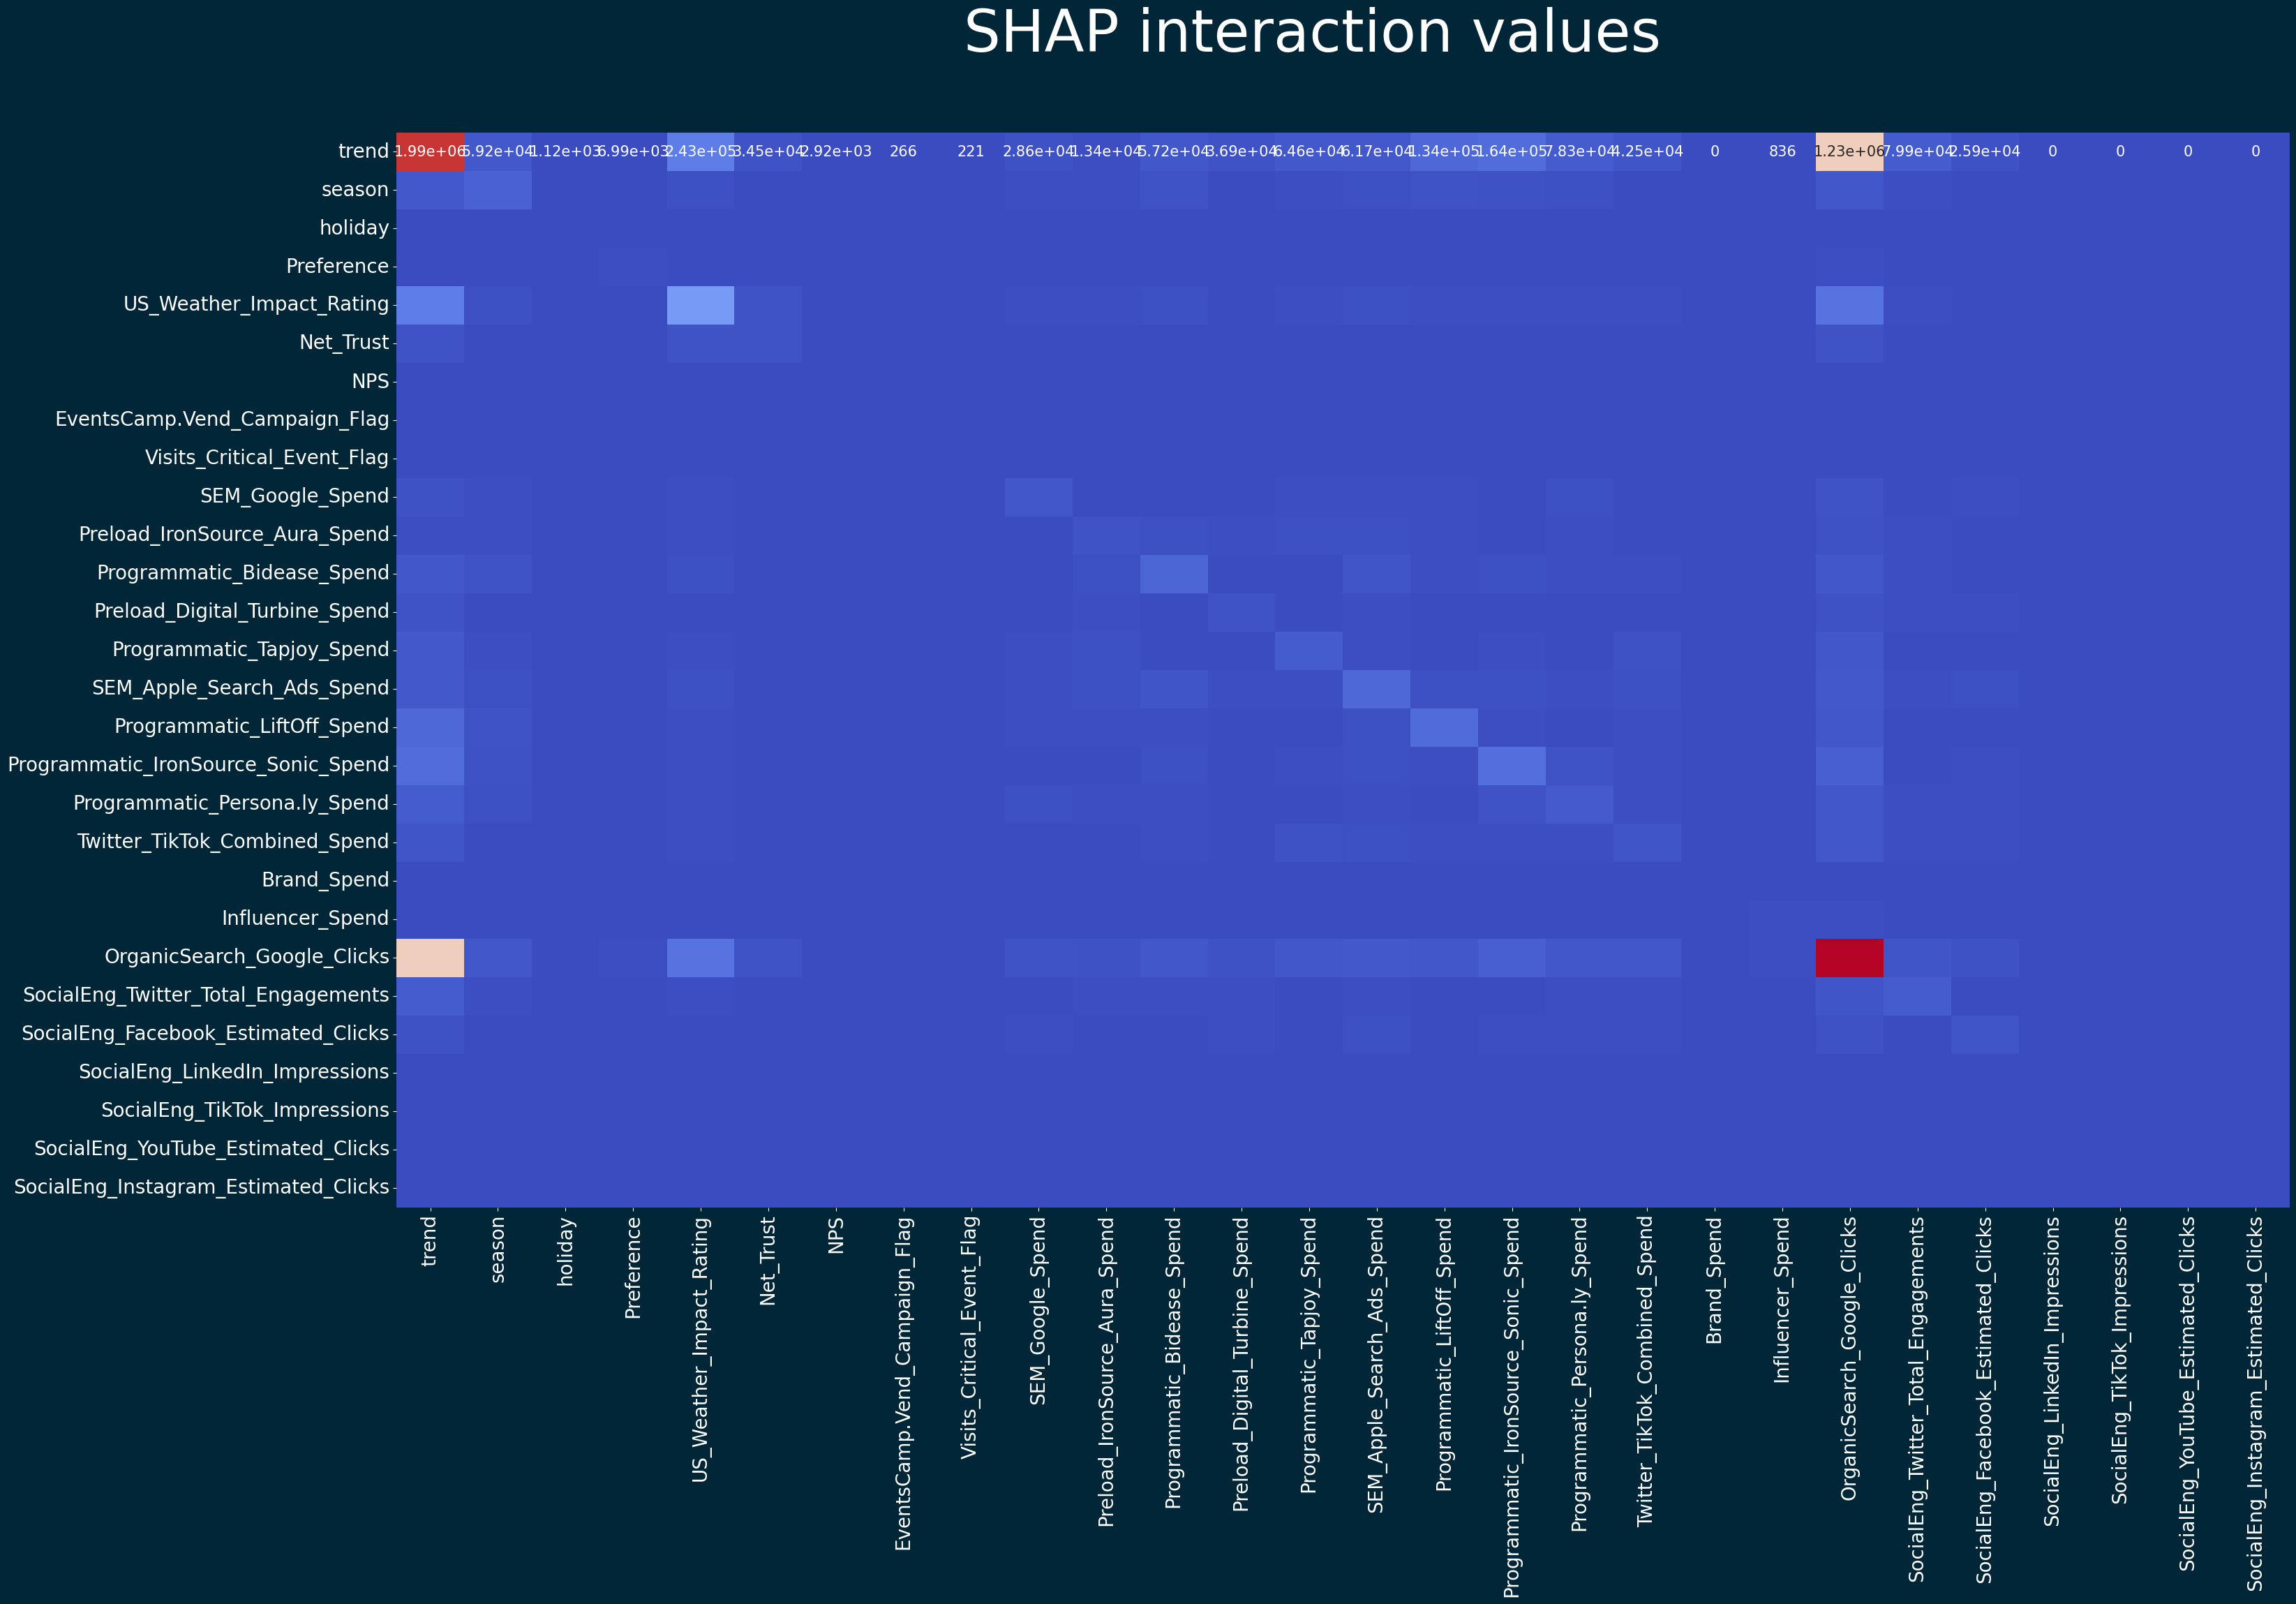

In [69]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb

# Load JSON file
with open(r"C:\Users\DeepakArun\Desktop\V2model1.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())

# Read data from csv file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Shapv2.xlsx")

# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}

# Prepare data (X) using only available features
X = df[available_features].values
y = df['dep_var'].values  # Replace 'target_variable' with the actual name of your target variable

# Fit a tree-based model (XGBoost in this case)
model = xgb.XGBRegressor()
model.fit(X, y)

# Use SHAP to calculate SHAP values and interaction values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_interaction_values = explainer.shap_interaction_values(X)

# Compute the mean absolute SHAP interaction values along the correct axis
mean_shap = np.abs(shap_interaction_values).mean(axis=0)

# Create a DataFrame from the mean SHAP values
df_shap = pd.DataFrame(mean_shap, index=available_features, columns=available_features)

# Multiply off-diagonal elements by 2
for i in range(len(df_shap)):
    for j in range(len(df_shap)):
        if i != j:
            df_shap.iloc[i, j] *= 2

# Create the heatmap
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.3g', cbar=False, ax=ax,
            annot_kws={"size": 15})  # Set annotation font size
ax.tick_params(axis='x', colors='w', labelsize=20, rotation=90)  # Increase tick label size
ax.tick_params(axis='y', colors='w', labelsize=20)

plt.suptitle("SHAP interaction values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0) 
plt.show()


In [21]:
shap_values

.values =
array([[ 3.91962367e+06, -1.80246928e+04,  7.37168570e+03, ...,
         0.00000000e+00,  3.19133981e+14,  1.03508187e+13],
       [ 3.91310531e+06, -4.75703276e+04,  7.37168570e+03, ...,
         0.00000000e+00, -3.50670839e+14,  1.13855118e+13],
       [ 3.90658695e+06, -7.97860457e+04,  7.37168570e+03, ...,
         0.00000000e+00, -7.45316590e+14,  7.98928550e+12],
       ...,
       [-3.35469428e+06, -1.84721507e+05,  7.37168570e+03, ...,
         0.00000000e+00, -1.06481748e+14,  2.16209757e+12],
       [-3.36384692e+06, -1.82824562e+05,  7.37168570e+03, ...,
         0.00000000e+00, -3.31169969e+14, -8.53469488e+11],
       [-3.37299955e+06, -1.75959077e+05,  7.37168570e+03, ...,
         0.00000000e+00, -6.45497057e+14, -2.93709772e+12]])

.base_values =
array([6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.77001

In [23]:
shap_interaction

array([[[ 1.53634498e+13, -7.06500126e+10,  2.88942338e+10, ...,
          0.00000000e+00,  1.25088511e+21,  4.05713141e+19],
        [-7.06500126e+10,  3.24889550e+08, -1.32872370e+08, ...,
         -0.00000000e+00, -5.75229197e+18, -1.86570327e+17],
        [ 2.88942338e+10, -1.32872370e+08,  5.43417500e+07, ...,
          0.00000000e+00,  2.35255541e+18,  7.63029823e+16],
        ...,
        [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.25088511e+21, -5.75229197e+18,  2.35255541e+18, ...,
          0.00000000e+00,  1.01846498e+29,  3.30329799e+27],
        [ 4.05713141e+19, -1.86570327e+17,  7.63029823e+16, ...,
          0.00000000e+00,  3.30329799e+27,  1.07139448e+26]],

       [[ 1.53123932e+13, -1.86147702e+11,  2.88461825e+10, ...,
          0.00000000e+00, -1.37221193e+21,  4.45527066e+19],
        [-1.86147702e+11,  2.26293606e+09, -3.50673503e+08, ...,
         -0.00000000e+00,  1.66815267e

In [30]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import shap

# Load JSON file
with open(r"C:\Users\DeepakArun\Documents\Desktop\TWC\Robyn\20k\RobynModel-1_1160_2.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())

# Read data from csv file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\shap.xlsx")


# Min-Max Normalization
#df = df.drop('dep_var', axis=1)
#df= (df-df.min())/(df.max()-df.min())



# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}
model = LinearRegression()
model.coef_ = np.array([filtered_coefficients[var] for var in available_features])
model.intercept_ = intercept

# Prepare data (X) using only available features
X = df[available_features].values

# Use SHAP to calculate SHAP values
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X)

#Get SHAP interaction values
#explainer = shap.TreeExplainer(model)
shap_interaction = explainer.interaction_values(X)

shap_values.interaction_values

Available features: ['trend', 'season', 'holiday', 'Preference', 'US.Weather.Impact.Rating', 'Seen.as.experts_lag181d', 'EventsCamp.Vend_Campaign_Flag', 'Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Facebook_Impressions']
Missing features: []


AttributeError: 'LinearExplainer' object has no attribute 'interaction_values'

In [25]:
shap_values

.values =
array([[ 3.91962367e+06, -1.80246928e+04,  7.37168570e+03, ...,
         0.00000000e+00,  3.19133981e+14,  1.03508187e+13],
       [ 3.91310531e+06, -4.75703276e+04,  7.37168570e+03, ...,
         0.00000000e+00, -3.50670839e+14,  1.13855118e+13],
       [ 3.90658695e+06, -7.97860457e+04,  7.37168570e+03, ...,
         0.00000000e+00, -7.45316590e+14,  7.98928550e+12],
       ...,
       [-3.35469428e+06, -1.84721507e+05,  7.37168570e+03, ...,
         0.00000000e+00, -1.06481748e+14,  2.16209757e+12],
       [-3.36384692e+06, -1.82824562e+05,  7.37168570e+03, ...,
         0.00000000e+00, -3.31169969e+14, -8.53469488e+11],
       [-3.37299955e+06, -1.75959077e+05,  7.37168570e+03, ...,
         0.00000000e+00, -6.45497057e+14, -2.93709772e+12]])

.base_values =
array([6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.77001

Available features: ['trend', 'season', 'holiday', 'Preference', 'US.Weather.Impact.Rating', 'Seen.as.experts_lag181d', 'EventsCamp.Vend_Campaign_Flag', 'Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Facebook_Impressions']
Missing features: ['(Intercept)']


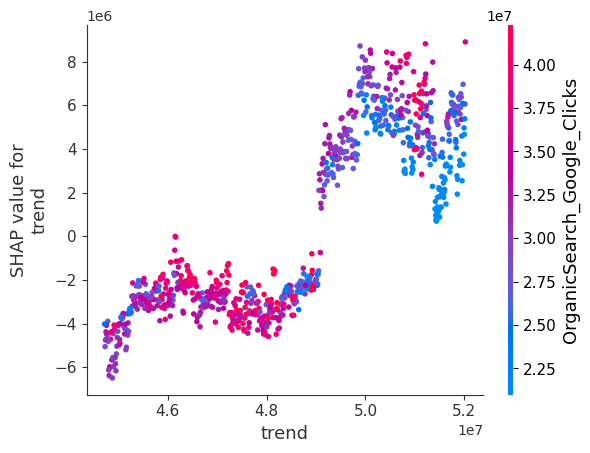

C:\Users\DeepakArun\anaconda3\lib\site-packages\matplotlib\colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


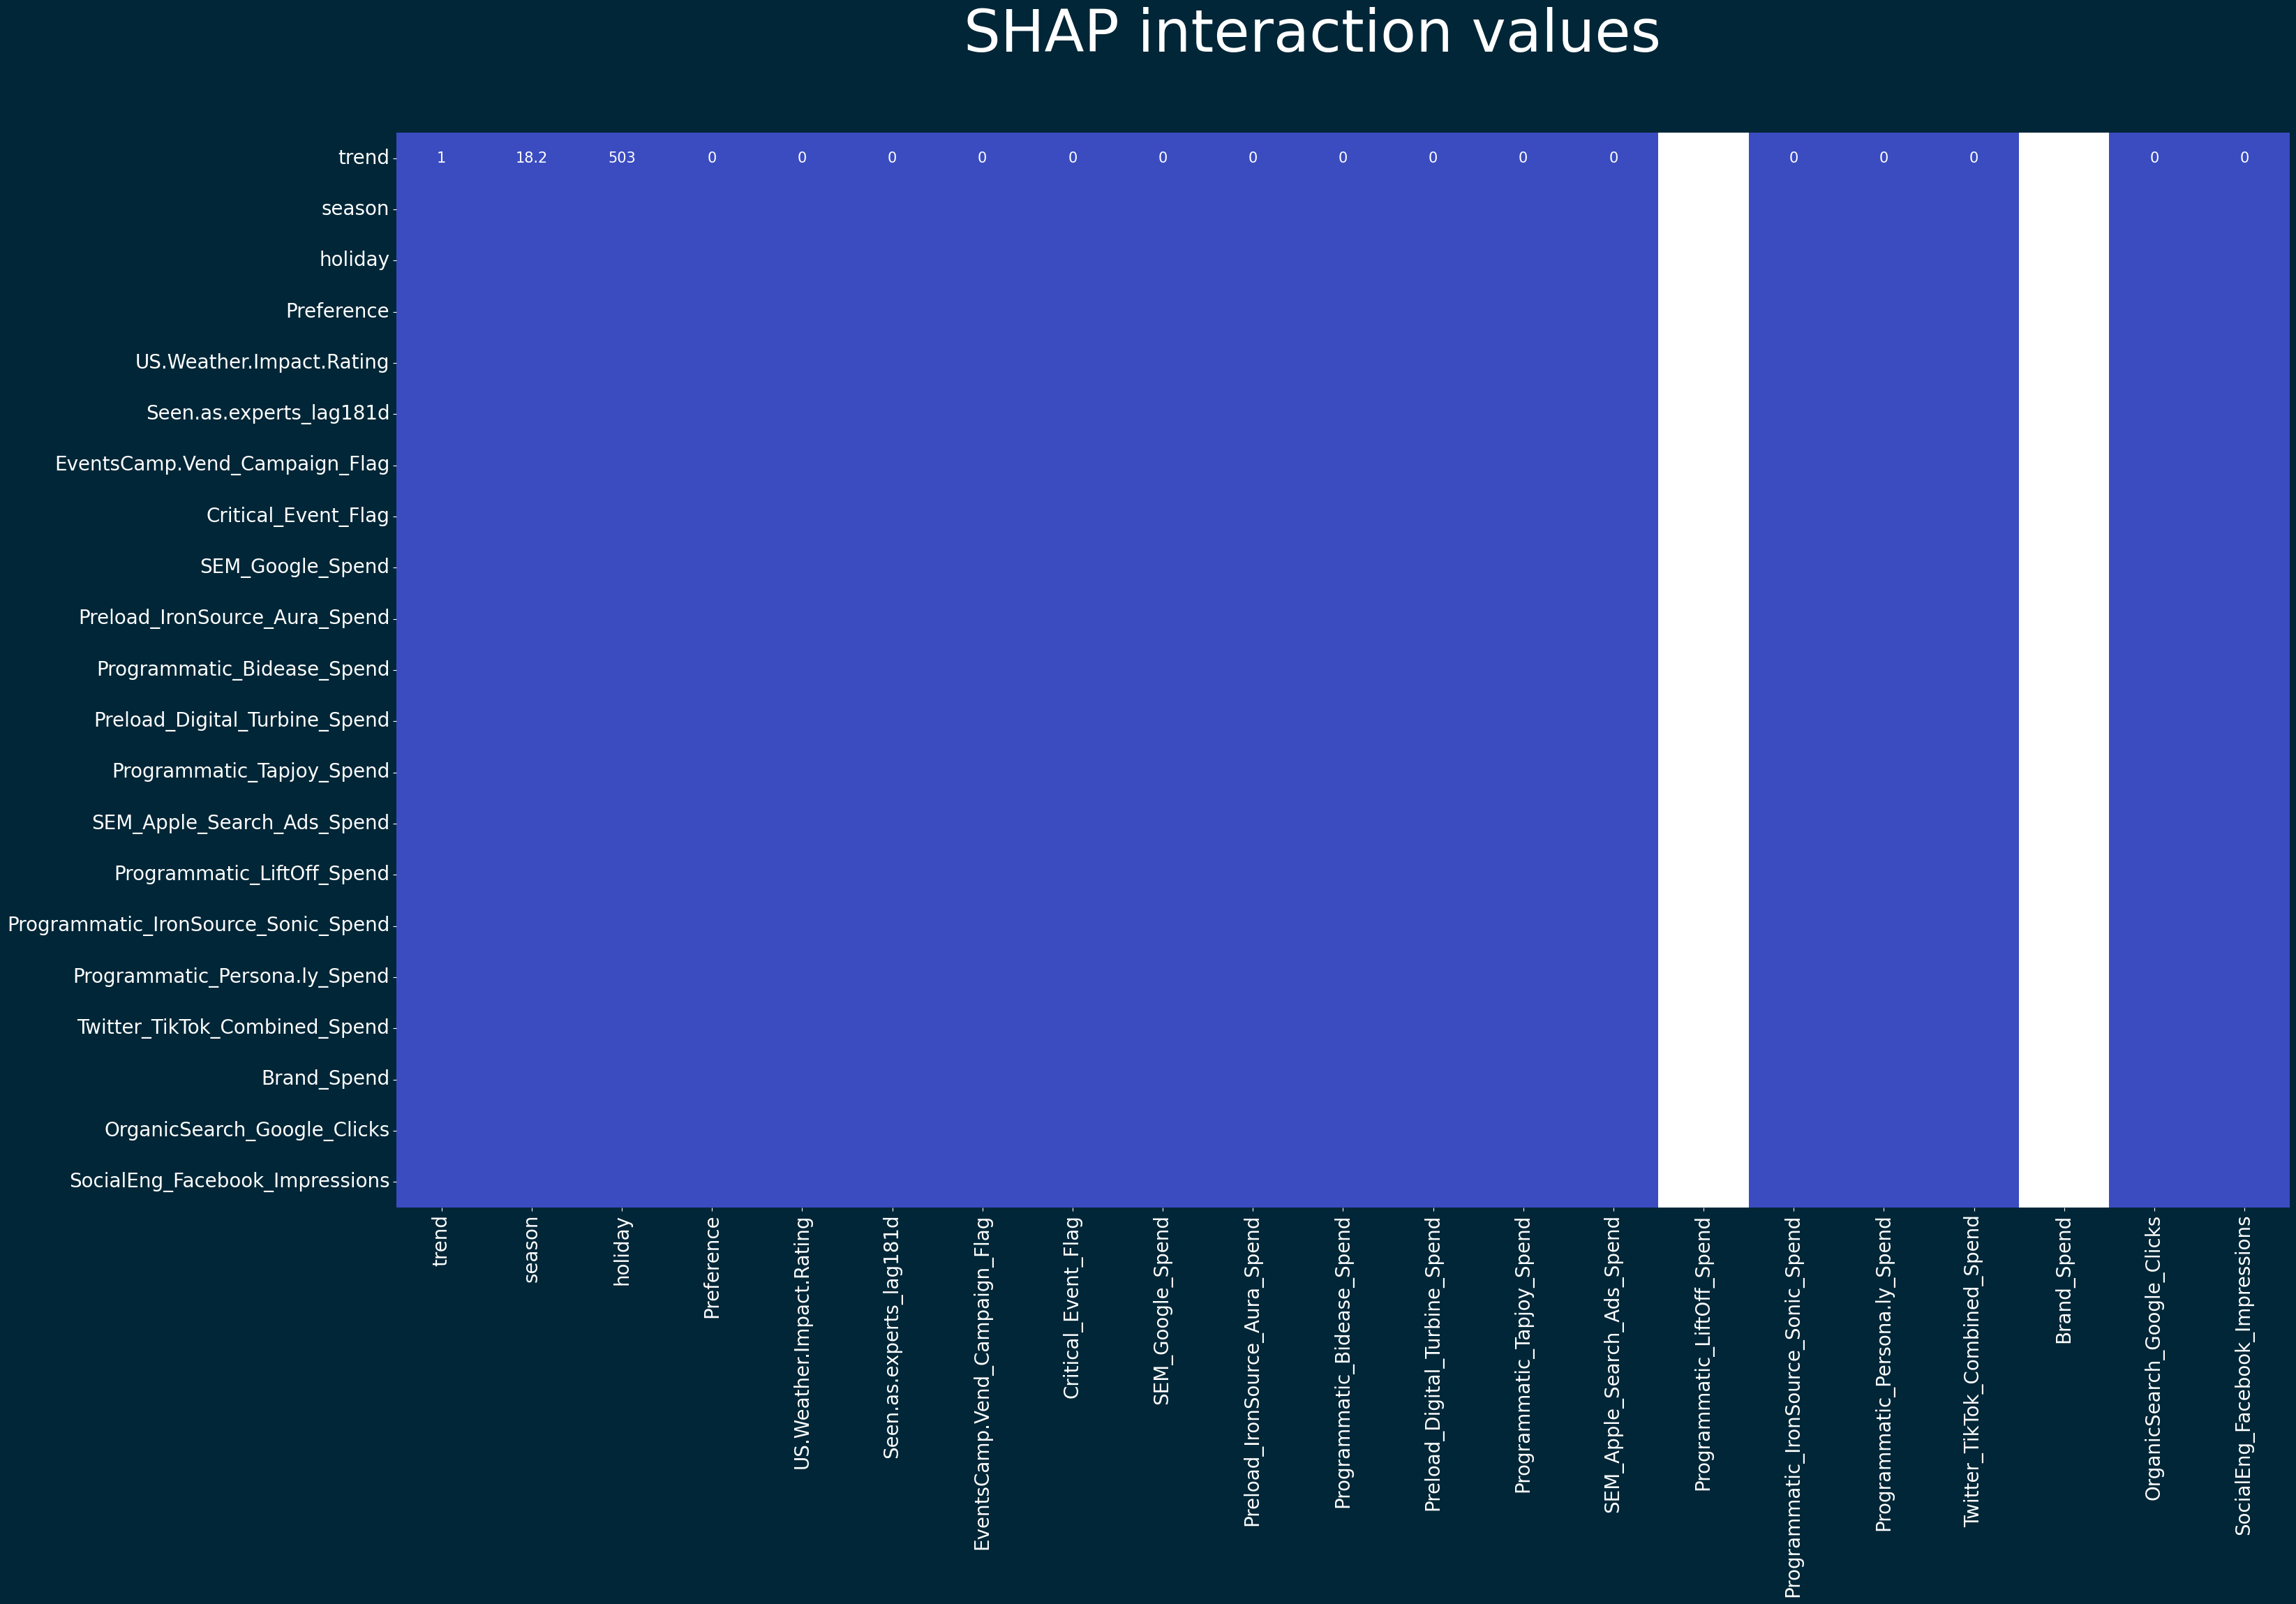

In [44]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load JSON file
with open(r"C:\Users\DeepakArun\Documents\Desktop\TWC\Robyn\20k\RobynModel-1_1160_2.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']
coefficients = {item['variable']: item['coef'] for item in summary}
feature_names = list(coefficients.keys())

# Read data from Excel file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Shap 1.xlsx")

# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}

# Prepare data (X) using only available features
X = df[available_features].values
y = df['dep_var'].values  # Assuming 'dep_var' is the target variable in your dataset

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X,y)

# Use SHAP to calculate SHAP values
explainer = shap.Explainer(xgb_model, X)
shap_values = explainer(X)

# Get SHAP interaction values
shap_interaction_values = explainer.shap_interaction_values(X)

# Compute the mean absolute SHAP interaction values along the correct axis
mean_shap = np.abs(shap_interaction).mean(axis=0)

# Function to plot SHAP values
def plot_shap_values(ax, shap_values, feature_names, index):
    shap.dependence_plot(index, shap_values.values, X, feature_names=feature_names, ax=ax)

# Plot SHAP values for a specific feature (for example, feature index 0)
fig, ax = plt.subplots()
plot_shap_values(ax, shap_values, available_features, 0)
plt.show()

# Create a DataFrame from the mean SHAP values
df_shap = pd.DataFrame(mean_shap, index=available_features, columns=available_features)

# Multiply off-diagonal elements by 2
for i in range(len(df_shap)):
    for j in range(len(df_shap)):
        if i != j:
            df_shap.iloc[i, j] *= 2

# Create the heatmap
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.3g', cbar=False, ax=ax,
            annot_kws={"size": 15})  # Set annotation font size
ax.tick_params(axis='x', colors='w', labelsize=20, rotation=90)  # Increase tick label size
ax.tick_params(axis='y', colors='w', labelsize=20)

plt.suptitle("SHAP interaction values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0) 
plt.show()


In [45]:
df_shap

,trend,season,holiday,Preference,US.Weather.Impact.Rating,Seen.as.experts_lag181d,EventsCamp.Vend_Campaign_Flag,Critical_Event_Flag,SEM_Google_Spend,Preload_IronSource_Aura_Spend,...,Preload_Digital_Turbine_Spend,Programmatic_Tapjoy_Spend,SEM_Apple_Search_Ads_Spend,Programmatic_LiftOff_Spend,Programmatic_IronSource_Sonic_Spend,Programmatic_Persona.ly_Spend,Twitter_TikTok_Combined_Spend,Brand_Spend,OrganicSearch_Google_Clicks,SocialEng_Facebook_Impressions
trend,1.000000e+00,1.822717e+01,5.026219e+02,4.958160e-07,2.952058e-06,1.141675e-07,0.000092,1.299721e-06,2.584340e-05,2.967738e-05,...,2.647435e-02,0.002356,9.979461e-07,inf,0.000302,0.005000,1.218237e-06,inf,6.291833e-08,5.581398e-06
season,1.337740e+00,1.000000e+00,1.238519e+02,1.355940e-07,7.610883e-07,2.904635e-08,0.000024,3.032412e-07,4.763812e-06,2.043608e-05,...,8.115540e-03,0.000674,2.380624e-07,inf,0.000079,0.001184,3.000323e-07,inf,1.001110e-08,1.296504e-06
holiday,4.001547e-01,2.707931e-01,1.000000e+00,7.906338e-09,3.809164e-08,1.564587e-09,0.000001,1.445562e-08,1.761111e-07,4.311994e-07,...,1.315401e-04,0.000046,9.796697e-09,inf,0.000005,0.000031,1.760466e-08,inf,4.387419e-10,4.769035e-08
Preference,5.283777e+07,1.395094e+08,3.443436e+09,1.000000e+00,1.952820e+01,6.698161e-01,637.792850,8.590440e+00,1.925368e+02,3.182177e+02,...,1.340730e+05,18349.388803,6.395545e+00,inf,2060.559496,40174.074280,7.108006e+00,inf,4.596314e-01,3.979489e+01
US.Weather.Impact.Rating,1.535681e+07,4.296140e+07,9.387460e+08,9.427976e-01,1.000000e+00,1.994532e-01,167.816724,2.090278e+00,3.690687e+01,5.468967e+01,...,5.015411e+04,4699.663731,1.558647e+00,inf,717.463565,8358.976770,2.041678e+00,inf,6.370931e-02,9.994591e+00
Seen.as.experts_lag181d,2.540053e+08,7.054435e+08,1.718417e+10,1.870211e+01,9.934326e+01,1.000000e+00,2999.319618,4.255455e+01,9.470515e+02,1.980341e+03,...,6.053427e+05,96194.286085,3.697294e+01,inf,10740.171290,82398.496619,5.789473e+01,inf,1.399766e+00,1.780726e+02
EventsCamp.Vend_Campaign_Flag,1.509769e+05,4.687244e+05,1.140267e+07,1.394267e-02,7.080913e-02,2.582750e-03,1.000000,2.738064e-02,5.191334e-01,9.949358e-01,...,6.181243e+02,63.282394,2.565193e-02,inf,11.040156,146.615221,2.941825e-02,inf,1.416283e-03,1.144326e-01
Critical_Event_Flag,4.124400e+07,5.542480e+07,1.143996e+09,1.737004e+00,7.291002e+00,2.783130e-01,222.519157,1.000000e+00,5.616681e+01,9.977425e+01,...,4.776139e+04,8474.999205,3.389670e+00,inf,2880.798611,9474.281220,2.280743e+00,inf,1.322001e-01,1.276974e+01
SEM_Google_Spend,3.852955e+06,6.287797e+06,2.045679e+08,2.273736e-01,1.242540e+00,4.588270e-02,39.102868,4.940628e-01,1.000000e+00,3.310008e+01,...,9.592443e+03,1066.446748,4.029285e-01,inf,117.054943,2017.746907,4.240006e-01,inf,2.792334e-02,1.591536e+00
Preload_IronSource_Aura_Spend,1.148589e+06,6.206935e+06,1.588535e+08,1.731968e-01,9.708374e-01,4.556582e-02,30.447467,3.901898e-01,7.829265e+00,1.000000e+00,...,5.600625e+03,866.442064,3.140557e-01,inf,225.720604,1388.642895,3.550269e-01,inf,2.310666e-02,2.487889e+00


In [46]:
mean_shap

array([[1.00000000e+00, 1.82271715e+01, 5.02621950e+02, 4.95815953e-07,
        2.95205817e-06, 1.14167546e-07, 9.24184363e-05, 1.29972079e-06,
        2.58433984e-05, 2.96773796e-05, 1.86838363e-05, 2.64743490e-02,
        2.35639264e-03, 9.97946069e-07,            inf, 3.02431180e-04,
        4.99983245e-03, 1.21823683e-06,            inf, 6.29183303e-08,
        5.58139807e-06],
       [1.33774010e+00, 1.00000000e+00, 1.23851943e+02, 1.35593952e-07,
        7.61088273e-07, 2.90463530e-08, 2.39497535e-05, 3.03241248e-07,
        4.76381207e-06, 2.04360788e-05, 2.97120808e-06, 8.11554048e-03,
        6.74196223e-04, 2.38062404e-07,            inf, 7.90543632e-05,
        1.18359255e-03, 3.00032337e-07,            inf, 1.00111050e-08,
        1.29650359e-06],
       [4.00154730e-01, 2.70793089e-01, 1.00000000e+00, 7.90633828e-09,
        3.80916393e-08, 1.56458724e-09, 1.22459094e-06, 1.44556152e-08,
        1.76111080e-07, 4.31199350e-07, 1.83641556e-07, 1.31540089e-04,
        4.5611